# Analysis Seoul CCTV

> 목적 : 서울시에서 인구대비 CCTV 갯수가 많은 곳과 적은 곳을 알아본다.   
> 활용 데이터 : 서울시 CCTV 갯수, 서울시 인구수

## 1. 데이터 읽기

In [28]:
# 라이브러리 임포트
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

# 한글 깨짐 방지
from matplotlib import rc
plt.rcParams["axes.unicode_minus"] = False
rc("font", family="Malgun Gothic") 
get_ipython().run_line_magic("matplotlib", "inline")

In [29]:
# 데이터 1 : 서울시 CCTV 갯수
cctv = pd.read_csv("../data/01.Seoul_CCTV.csv")
cctv.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [30]:
# 데이터 2 : 서울시 인구수
people = pd.read_excel("../data/01.Seoul_Population.xls")
people.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017,합계,4220082,10124579,4957857,5166722,9857426,4830206,5027220,267153,127651,139502,2.34,1365126
3,2017,종로구,73594,164257,80094,84163,154770,75967,78803,9487,4127,5360,2.1,26182
4,2017,중구,60412,134593,66337,68256,125709,62253,63456,8884,4084,4800,2.08,21384


In [31]:
# 필요없는 데이터를 날리고 가져온다.
people = pd.read_excel(
    "../data/01.Seoul_Population.xls", header=2, usecols="B,D,G,J,N"
)
people.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [32]:
# 필요없는 데이터를 날리고 가져온다.
people.drop([0],inplace=True)
people.head()

,자치구,계,계.1,계.2,65세이상고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953


---

## 2. 데이터 전처리
- 서울시 CCTV 데이터와, 인구 수 데이터를 각각 df1, df2라고 하자.
- df1, df2를 서울시 구별 기준으로 합쳐서 사용할 것이기 때문에 이를 위한 전처리를 한다.
- 필요한 데이터를 생성/변경/제거한다.

### 2.1 데이터 생성/변경/삭제

In [33]:
cctv.rename(columns={cctv.columns[0]:'구별'}, inplace=True)
cctv.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [34]:
# 2013년도 이전 보유수 대비 최근 3년간 CCTV 증가율
cctv['최근증가율'] = (
    (cctv['2016년'] + cctv['2015년'] + cctv['2014년']) / cctv['2013년도 이전']
    *100
)

cctv.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


In [35]:
people.rename(
    columns={
        people.columns[0]: "구별",
        people.columns[1]: "인구수",
        people.columns[2]: "한국인",
        people.columns[3]: "외국인",
        people.columns[4]: "고령자",
    },
    inplace=True
)
people.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953


In [36]:
people["외국인비율"] = people["외국인"] / people["인구수"] * 100
people["고령자비율"] = people["고령자"] / people["인구수"] * 100
people.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


In [37]:
cctv.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195


### 2.2 데이터 병합

In [38]:
people.head(1)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656


In [39]:
# CCTV 데이터, 인구수 데이터를 구별 기준으로 합치기
df_result = pd.merge(cctv, people, on='구별')
df_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


In [40]:
# 필요없는 열 삭제
del df_result['2013년도 이전']
del df_result['2014년']
df_result.drop(['2015년','2016년'], axis=1, inplace=True)
df_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


In [41]:
# 인덱스 열을 구별로 설정
df_result.set_index('구별', inplace=True)
df_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


In [42]:
df_result['인구대비CCTV'] = df_result['소계']/df_result['인구수']
df_result['인구대비CCTV'] = df_result['인구대비CCTV']*100
df_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,인구대비CCTV
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


In [35]:
# 인구 대비 CCTV 갯수가 많은 지역
df_result.sort_values(by='인구대비CCTV',ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,인구대비CCTV
구별,,,,,,,,,
종로구,1619,248.922414,164257,154770,9487,26182,5.775705,15.939656,0.985651
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456
중구,1023,147.699758,134593,125709,8884,21384,6.600640,15.887899,0.760069
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
금천구,1348,100.000000,253491,235154,18337,34170,7.233787,13.479769,0.531774


In [36]:
# 인구 대비 CCTV 갯수가 적은 지역
df_result.sort_values(by='인구대비CCTV',ascending=True).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,인구대비CCTV
구별,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833


---

## 3. 데이터 시각화
### 3.1 인구대비 CCTV 갯수 시각화

In [43]:
df_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,인구대비CCTV
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


<AxesSubplot:xlabel='구별'>

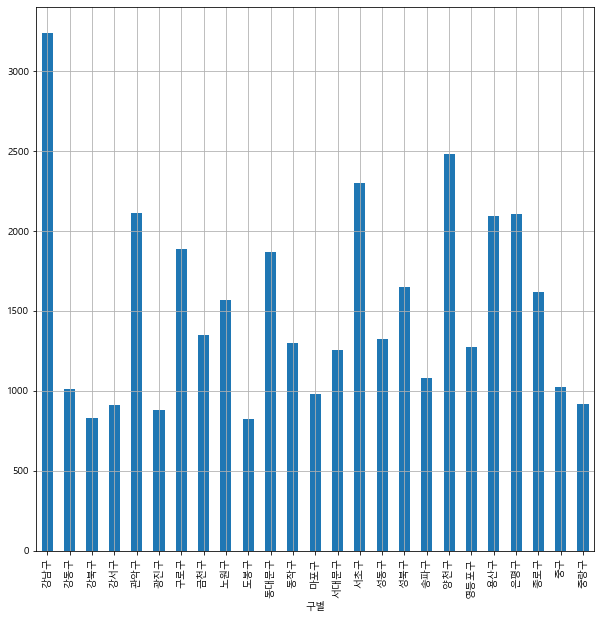

In [48]:
df_result["소계"].plot(kind="bar", grid=True, figsize=(10, 10))

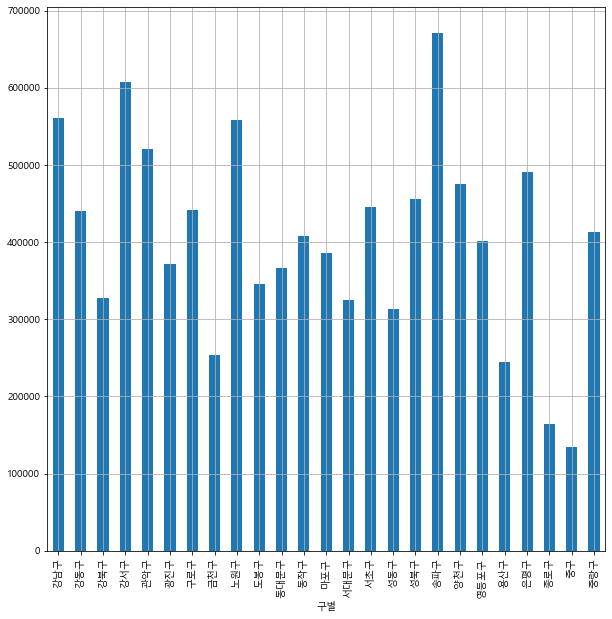

In [47]:
df_result["인구수"].plot(kind="bar", grid=True, figsize=(10, 10))

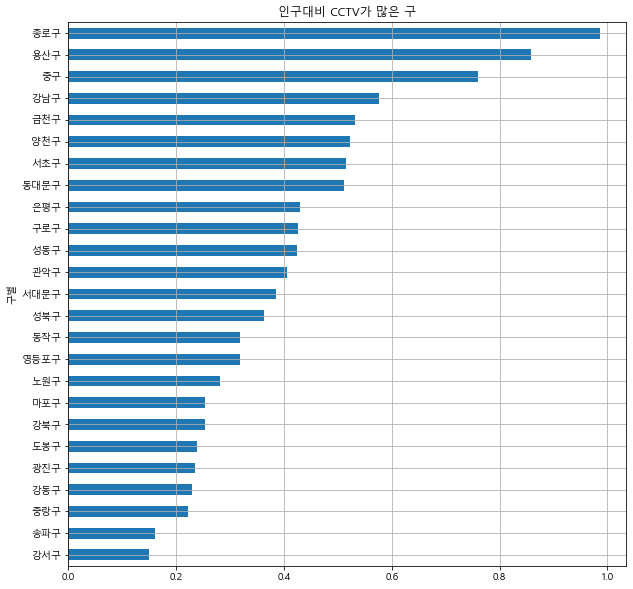

In [50]:
def drawGraph():
    df_result["인구대비CCTV"].sort_values(ascending=True).plot(
        kind="barh", grid=True, title="인구대비 CCTV가 많은 구", figsize=(10, 10));
drawGraph()

### 3.2 데이터의 경향 표시

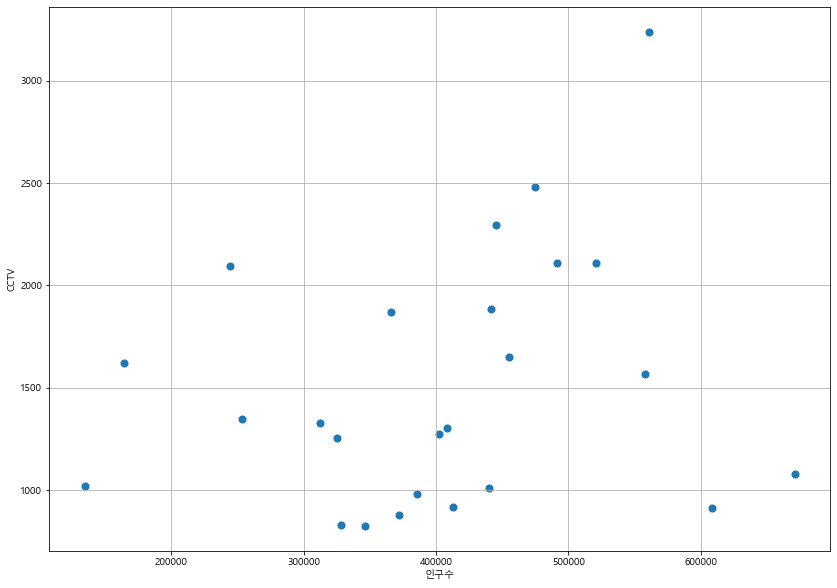

In [52]:
# 산점도를 활용하여 데이터의 경향 표시

def drawGraph():
    plt.figure(figsize=(14, 10))
    plt.scatter(df_result["인구수"], df_result["소계"], s=50)
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid(True)
    plt.show() 
drawGraph()

In [57]:
# numpy를 이용한 1차 직선으로 경향성 확인
# np.polyfit(): 직선을 구성하기 위한 계수를 계산
# np.poly1d(): polyfit 으로 찾은 계수로 파이썬에서 사용할 수 있는 함수로 만들어주는 기능 

fp1 = np.polyfit(df_result["인구수"], df_result["소계"], 1)
fp1

array([1.11155868e-03, 1.06515745e+03])

In [58]:
f1 = np.poly1d(fp1)

In [59]:
# 인구가 40만인 구에서 서울시의 전체 경향에 맞는 적당한 CCTV 수는?
f1(400000)

1509.7809252413333

In [63]:
# 경향선을 그리기 위한 X 데이터 생성
# np.linspace(a, b, n): a부터 b까지 n개의 등간격 데이터 생성

fx = np.linspace(100000, 700000, 100)

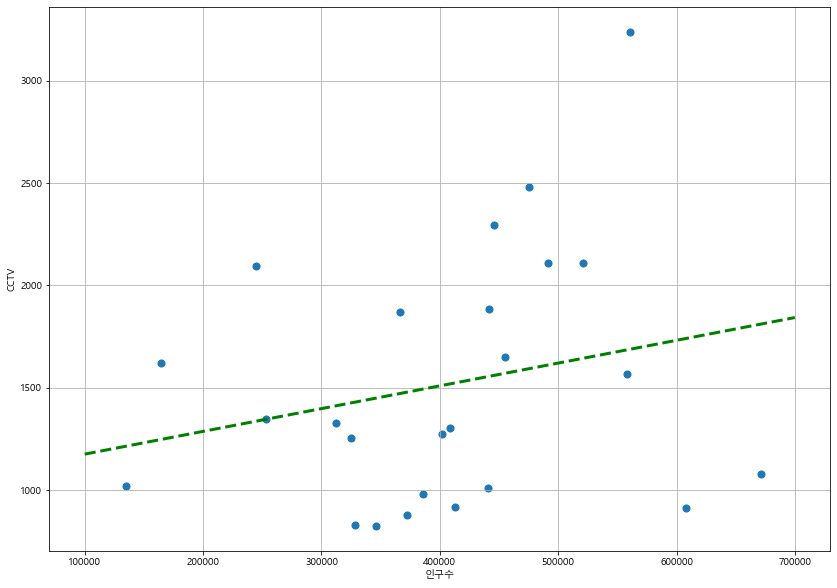

In [61]:
def drawGraph():
    
    plt.figure(figsize=(14, 10))
    plt.scatter(df_result["인구수"], df_result["소계"], s=50)
    plt.plot(fx, f1(fx), ls="dashed", lw=3, color="g")
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid(True)
    plt.show() 
drawGraph()

---

## 4. 강조하고 싶은 데이터 시각화

In [64]:
df_result.head(3)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,인구대비CCTV
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352


In [65]:
# 경향은 f1 함수에 해당 인구를 입력
# f1(data_result["인구수"])

fp1 = np.polyfit(df_result["인구수"], df_result["소계"], 1) 
f1 = np.poly1d(fp1) 
fx = np.linspace(100000, 700000, 100) 

In [66]:
df_result["오차"] = df_result["소계"] - f1(df_result["인구수"])

In [67]:
df_result.head(3)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,인구대비CCTV,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358,-544.642322
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352,-598.750923


In [68]:
# 경향과 비교해서 데이터의 오차가 너무 나는 데이터를 계산 

df_sort_f = df_result.sort_values(by="오차", ascending=False) # 내림차순 
df_sort_t = df_result.sort_values(by="오차", ascending=True) # 오름차순 

In [69]:
# 경향 대비 CCTV를 많이 가진 구 
df_sort_f.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,인구대비CCTV,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,34.671731,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,63.371266,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,85.237258,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700


In [70]:
# 경향 대비 CCTV를 적게 가진 구 
df_sort_t.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,인구대비CCTV,오차
구별,,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628
도봉구,825,246.638655,346234,344166,2068,53488,0.597284,15.448512,0.238278,-625.016861
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910,-607.986645
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527


In [72]:
# 색상 커스텀
from matplotlib.colors import ListedColormap

# colormap 을 사용자 정의(user define)로 세팅 
color_step = ["#e74c3c", "#2ecc71", "#95a9a6", "#2ecc71", "#3498db", "#3489db"]
my_cmap = ListedColormap(color_step)

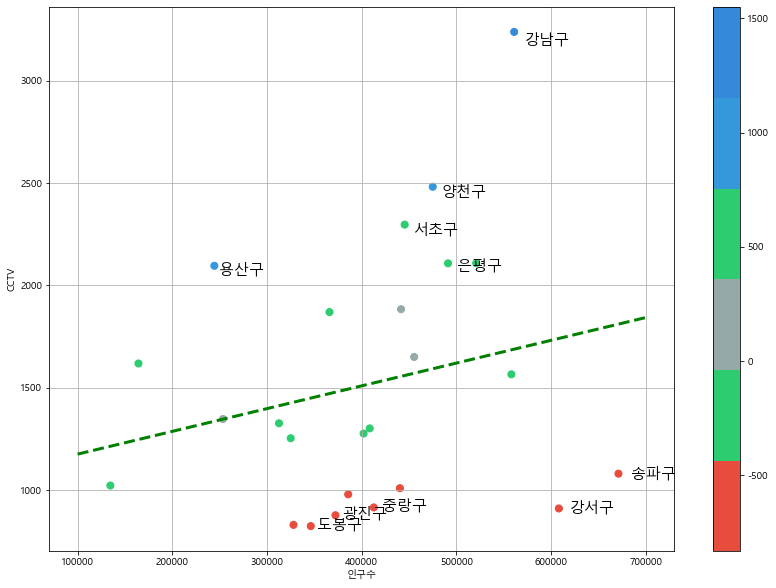

In [74]:
def drawGraph():
    
    plt.figure(figsize=(14, 10))
    plt.scatter(df_result["인구수"], df_result["소계"], s=50, c=df_result["오차"], cmap=my_cmap)
    plt.plot(fx, f1(fx), ls="dashed", lw=3, color="g")

    
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.colorbar()
    plt.grid(True)
    
    for n in range(5):
        # plt.text(x좌표,y좌표,표기명)
        # 상위 5개를 좌표위에 표기해라
        plt.text(
            df_sort_f["인구수"][n] *1.02, # x 좌표
            df_sort_f["소계"][n] *0.98,  # y 좌표
            df_sort_f.index[n], # title 
            fontsize=15
        )
    
        # 하위 5개 좌표위에 표기해라
        plt.text(
            df_sort_t["인구수"][n] * 1.02, 
            df_sort_t["소계"][n] * 0.98,
            df_sort_t.index[n],
            fontsize=15
        )
            
    plt.show() 

drawGraph()

---

## 5. 저장

In [77]:
# 현재까지 작업한 파일
df_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,인구대비CCTV,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358,-544.642322
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352,-598.750923
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854,464.799395


In [75]:
# 데이터 저장
df_result.to_csv("../data/01.CCTV_result.csv", sep=",", encoding="utf-8")

In [76]:
# 저장 확인
save = pd.read_csv("../data/01.CCTV_result.csv", encoding="utf-8")
save.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,인구대비CCTV,오차
0,강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
1,강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358,-544.642322
2,강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352,-598.750923
3,강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
4,관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854,464.799395
